In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('/content/Restaurant_Reviews.tsv',sep='\t')

checking the top 5 rows

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


Checking the no.of rows and columns

In [ ]:
df.shape

(1000, 2)

checking the columns

In [ ]:
df.columns

Index(['Review', 'Liked'], dtype='object')

checking the null values

In [ ]:
df.isnull().sum()

,0
Review,0
Liked,0


**conclusion:**There are no null values in the dataset

checking wether the dataset is balanced or imbalanced

In [ ]:
df['Liked'].value_counts()

,count
Liked,
1,500
0,500


**conclusion:**The dataset is highly balanced

In [ ]:
df['char_count']=df['Review'].apply(len)

In [ ]:
df.head(2)

,Review,Liked,char_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18


In [ ]:
df['word_count']=df['Review'].apply(lambda x :len(str(x).split()))

In [ ]:
df.head()

,Review,Liked,char_count,word_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [ ]:
import nltk

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df['sent_count']=df['Review'].apply(lambda x:len(nltk.sent_tokenize(str(x))))

In [ ]:
df.head()

,Review,Liked,char_count,word_count,sent_count
0,Wow... Loved this place.,1,24,4,2
1,Crust is not good.,0,18,4,1
2,Not tasty and the texture was just nasty.,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1


In [ ]:
#calculating the average of char_counts for positive and negative reviews
df[df['Liked']==1]['char_count'].mean()

55.88

In [ ]:
df[df['Liked']==0]['char_count'].mean()

60.75

**Text cleaning**

In [ ]:
import re

In [ ]:
df['Review'][1]

'Crust is not good.'

In [ ]:
#replacing non-alphabetical characters with spaces
review=re.sub('[^a-zA-Z]',' ',df['Review'][1])

In [ ]:
review

'Crust is not good '

In [ ]:
review=review.lower()

In [ ]:
review


'crust is not good '

In [ ]:
review=review.split()

In [ ]:
review

['crust', 'is', 'not', 'good']

Removing stop words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
all_stopwords=stopwords.words('english')
all_stopwords.remove('not')

In [ ]:
all_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
review=[word for word in review if word not in set(all_stopwords)]

In [ ]:
review

['crust', 'not', 'good']

Stemming

In [ ]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [ ]:
review=[ps.stem(word)for word in review ]

In [ ]:
review=" ".join(review)

In [ ]:
review

'crust not good'

In [ ]:
import re
custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                    'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                    'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}

corpus=[]
ps=PorterStemmer()
stop_words=set(stopwords.words('english'))-custom_stopwords


for i in range(len(df)):
  review=re.sub('[^a-zA-Z]',' ',df['Review'][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if word not in stop_words]
  review=" ".join(review)
  corpus.append(review)



In [ ]:
df['processed_text']=corpus

In [ ]:
df.head()

,Review,Liked,char_count,word_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


In [ ]:
#Displaying word cloud
from wordcloud import WordCloud

In [ ]:
wc=WordCloud(width=500,height=500,min_font_size=8,background_color='white')

In [ ]:
pos=wc.generate(df[df['Liked']==1]['processed_text'].str.cat(sep=''))

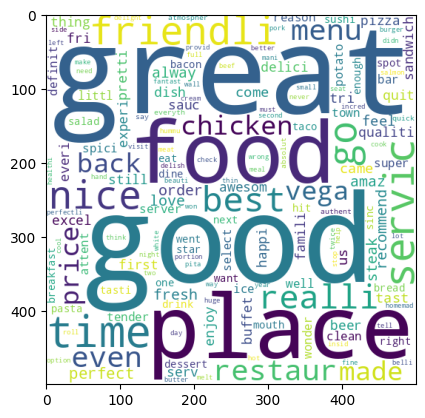

In [ ]:
plt.imshow(pos)

In [ ]:
neg=wc.generate(df[df['Liked']==0]['processed_text'].str.cat(sep=''))

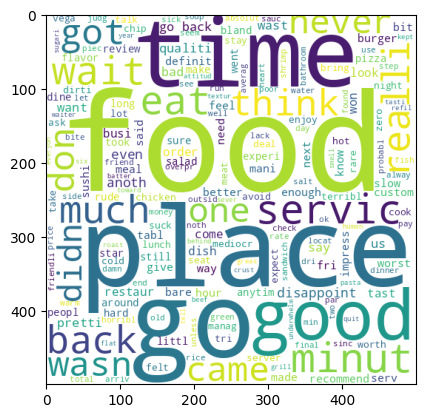

In [ ]:
plt.imshow(neg)

In [ ]:
df.head()

,Review,Liked,char_count,word_count,sent_count,processed_text
0,Wow... Loved this place.,1,24,4,2,wow love place
1,Crust is not good.,0,18,4,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,8,1,not tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,1,select menu great price


Bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer(max_features=1500)

In [ ]:
X=cv.fit_transform(corpus).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(1000, 1500)

In [ ]:
y=df['Liked']

In [ ]:
y

,Liked
0,1
1,0
2,0
3,1
4,1
...,...
995,0
996,0
997,0
998,0


Train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.68

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.79

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.785

Save the model

In [ ]:
import joblib

In [ ]:
joblib.dump(rf, 'Restaurant_review_model.pkl')


['Restaurant_review_model.pkl']